# Momentum Gradient Descent / RMSprop  avec Gradient stochastique

Groupe de travail, IRMA, le 7 Avril 2021        (Merci à Matthieu)


- Entraîner un réseau de neurones profonds est un **processus itératif**, souvent **très lent** à cause d'un très un grand ensemble de paramètres.  
 
- Le **choix** des algorithmes d'optimisation en deep learning peut influencer la vitesse d'entraînement du réseau et ses **performances**.

- Nous allons ici examiner **les qualités** et surtout **les défauts** des différentes variantes de l'algorithme. 

![Deep-Neural-Network.png](Deep-Neural-Network.png)

## Plan

1. Descente de gradient avec ou sans **gradient stochastique**
2. Descente de gradient avec inertie (Momentum) avec ou sans **gradient stochastique**
    -  Quelles sont les conditions, pour la convergence de l'agorithme,  sur les deux hyperparamètres $\alpha$ et $\beta$ d'inertie
       - un cas d'une fonction convexe 
       - un cas d'une focntion **non convexe**
     
3. Adagrad (Adaptive subgradient) 
4. RMSprop (Root Mean Square Propagation)  
...

##  I. Descent de gradient  (sans inertie)

L'algorithme de descente de gradient met à jour les paramètres en se déplaçant dans le sens opposé au gradient de la fonction objectif par rapport aux paramètres du réseau. 



$$ \textrm{Descente de gradient : }\ \ \  \boxed{ X^{(k+1)} =  X^{(k)} - \alpha \nabla F\big(  X^{(k)}\big)}$$



### 1. Une fonction convexe

Chercher la cible $x^{*} \in R^n $   qui rend minimale la fonction 

 
 $$\boxed{  F(x) = \frac{1}{2} x^{t} A x -  b^{t} x   }   $$ 
 
 
 $$ 
 \textrm{où  } A \ = \  Q\ \Lambda \  Q^{t}\  =\  Q \ \textrm{diag}(\lambda_{1}, ... \lambda_{n})\ Q^{t}  \\
  \textrm{  est  definie postive avec }  \lambda_{1}\leq , ... \leq \lambda_{n}. 
$$
 

$$ 
F(x_{1},  x_{2}) = \  0.775x_{1}^2-1.45  x_{1} x_{2}+ 0.775x_{2}^2 -0.1x_{1}-0.2x_{2},\\
\\ 
\forall \ x \ = (x_i)\  \in \ \mathbb{R}^2
$$

In [11]:
import math
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
#from numpy.random import rand
from numpy.random import seed
seed(seed=2021)

# objective function

A = np.array([[1.55, -1.45], [-1.45, 1.55]])
b = np.array([0.1, 0.2])

#  f = 0.5 * t(x) A x - b x  atteint le minimum <=> cible c = A^(-1) b

# 
from numpy.linalg import inv
Ainv = inv(A)
# cible 
c = Ainv.dot(b);
print("   1. La cible est ", "%4.2f."% c[0], "%4.2f." % c[1])

import scipy.linalg as la
print("   2. Les valeurs propres de A sont ", la.eig(A)[0])

def f(x1, x2):
    return 0.775 * x1 ** 2 - 1.45 * x1*x2 + 0.775 * x2 ** 2 - 0.1 * x1  - 0.2 * x2

delta = 0.005
x1, x2 = np.arange(-3, 4, delta), np.arange(-2, 3.50, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

np.random.normal(0, 0.25)

# gradient of objective function
def gd(x1, x2):
    return (1.55 * x1 -1.45 * x2 -0.1 + np.random.normal(0, 0.001),  
            1.55 * x2 -1.45 * x1 -0.2 + np.random.normal(0, 0.001))

   1. La cible est  1.48. 1.52.
   2. Les valeurs propres de A sont  [3. +0.j 0.1+0.j]


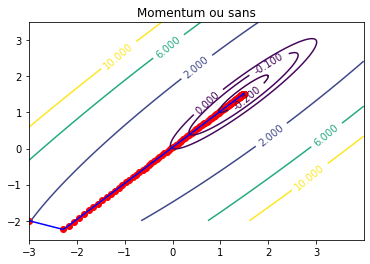

SANS Inertie :  N =  338 solution = 1.48. 1.52.


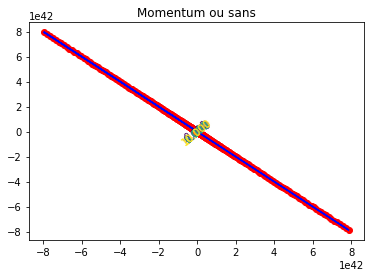

SANS Inertie :  N =  10000 solution = -7946470313396119936074939639371222050930688.00. 7946470313396119936074939639371222050930688.00.


In [12]:
tol = 1e-4
def gradient_descent(x10 =-3, x20 =-2, alpha=0.3, beta = 0.7):
    x11, x22 = x10, x20
    set = [np.array([x11, x22])]
    dir1, dir2 = gd(x11,x22)[0], gd(x11,x22)[1]
    x11 -= alpha * dir1 
    x22 -= alpha * dir2  
    k = 1
    while (abs(x11-c[0]) + abs(x22-c[1])) > tol and (k < 1e+4):       
        dir1, dir2 = beta* dir1 + gd(x11,x22)[0], beta* dir2 + gd(x11,x22)[1]
        x11 -= alpha * dir1 
        x22 -= alpha * dir2 
        set.append(np.array([x11, x22]))
        k += 1
        
    fig, ax = plt.subplots()
    #plt.figure(figsize=(10, 5))
    CS = ax.contour(X1, X2, Z, [-0.2258, -0.2, -0.1, 0, 2, 6, 10])
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title('Momentum ou sans')    
        
    x1s, x2s = np.array(set)[:, 0], np.array(set)[:, 1]
    plt.scatter(x1s, x2s,  color="red")
    plt.plot(x1s,x2s, color="blue")
    plt.show()
    if beta == 0:
        print("SANS Inertie :  N = ", k, "solution = %4.2f."% x11, "%4.2f." % x22  )
    else:
        print("AVEC Inertie :  N = ", k, "solution = %4.2f."% x11, "%4.2f." % x22)
         

gradient_descent( alpha = 0.30, beta = 0)   # sans momentum
gradient_descent( alpha = 0.67, beta = 0)   # sans momentum

hétérogénéité des pentes : les deux valeurs propres sont 0.1 et 3. 

Sur une région plate les gradients sont très petits. Problèmes :  

- le petit taux d'apprentissage $\alpha$ ne nous **permet pas** de bien *progresser* ;

- alors que l'algorithme **diverge** si ce taux est légèrement trop grand,  à cause de d'**une autre direction de forte pente**. 

### 2. Une fonction non convexe (voit plus loin)

## II. Descent de gradient avec inertie

- La descente du gradient peut être illustrée comme un robot qui descend une colline. Il suit le chemin le plus raide par coup 
$\alpha$ vers le bas. Si le coup $\alpha$ est trop grand, il n'arrive pas au but, mais si le coup $\alpha$  trop petit sa progression est devenue trop lente. 

- La descente du gradient  avec inertie (Momentum) peut être illustrée comme une balle lourde roulant sur la même colline. L'inertie supplémentaire agit  comme un accélérateur  [Boris. Polyak (1964)],   amortissant ou accentuer  les oscillations qui  nous parfois faisant traverser des vallées étroites, de petites bosses et des minima locaux.

Dans la règle de mise à jour de descente de gradient basée sur Momentum, nous avons également inclus le composant historique vₜ il stocke tous les mouvements de gradient précédents ti ll cette fois t.

$$
\textrm{ Momentum (avec inertie) }\ \ \  \boxed{
\begin{cases} 
D^{(k)} =  \beta D^{(k-1)} +  \nabla F\Big(  X^{(k-1)}\Big) \\
\\
X^{(k)} =  X^{(k-1)} - \alpha D^{(k)} \\
\end{cases}}
$$

- Lorsque l'inertie $\beta = 0$,  nous retouvons la descente de gradient. 

- Mais si l'inertie $\beta $ est grande,  ce coup de pouce nous donne une «accélération» audacieuse qui accélérant la convergence vers l'optimum avec une énergie renouvelée.

- Il évolue avec une moyenne cumulative exponentielle des gradients du passé et du gradient actuel. 


### 1. une fonction convexe

Chercher la cible $x^{*} \in R^n$ qui rend minimale la fonction 

 
 $$ F(x) = \frac{1}{2} x^{t} A x -  b^{t} x     $$ 
 
 
 $$ 
 \textrm{où  } A \ = \  Q\ \Lambda \  Q^{t}\  =\  Q \ \textrm{diag}(\lambda_{1}, ... \lambda_{n})\ Q^{t}  \\
  \textrm{  est  definie postive avec } \ \lambda_{1}\leq , ... \leq \lambda_{n}. 
$$
 

 


On voit que $  x^{*}= A^{-1} b  \textrm{ est la cible et  } \nabla F(x) = A x -  b = A (x -  x^{*}). $ 



Si on note $Z^{(k)} = Q^{t} D^{(k)}$, et $W^{(k)} =  Q^{t} (X^{(k)}- X^{*})$, noter que 

$$\Lambda = \textrm{diag}(\lambda_{1}, ...  \lambda_{n})  \textrm{ alors }  $$

$$
Q^{t} D^{(k)}  = \beta Q^{t} D^{(k-1)} +  Q^{t}  A (X^{(k-1)}- X^{*}) \Longleftrightarrow
Z^{(k)} = \beta  Z^{(k-1)} + \Lambda  W^{(k-1)} \\ 
\\
\textrm{  : n équations  }
$$

$$ 
Q^{t} (X^{(k)}-X^{*})  =  Q^{t} (X^{(k-1)}- X^{*}) - \alpha Q^{t} D^{(k)}  \Longleftrightarrow
W^{(k)} =  W^{(k-1)} - \alpha Z^{(k)} \\
\textrm{  :  n équations supplémentaires }
$$


$$
\textrm{ Il vient  } 
\begin{cases}
Z^{(k)} = \beta  Z^{(k-1)} + \Lambda  W^{(k-1)} \\
\\
W^{(k)} =  W^{(k-1)} - \alpha Z^{(k)}
\end{cases}
$$



$$ \textrm{C'est-à-dire pour  tout  }  1\leq  i \leq n :$$

$$
\begin{pmatrix} 
Z^{(k)}_{i} \\
\\
W^{(k)}_{i}\\
\end{pmatrix}
=
\begin{pmatrix} 
\beta & \lambda_{i} \\
\\
- \alpha \beta & 1 - \alpha \lambda_{i} \\
\end{pmatrix}
\begin{pmatrix} 
Z^{(k-1)}_{i} \\
\\
W^{(k-1)}_{i}\\
\end{pmatrix}
$$


Si on note

$$
R = \begin{pmatrix} 
\beta \lambda_{i} \\
\\
- \alpha \beta 1 - \alpha \lambda_{i} \\
\end{pmatrix},
$$

sa puissance $R^{k}$ se calcule facilement comme suit :

$$
\boxed{
R ^{k} = \begin{cases}
\sigma_{1}^{k}R_{2} - \sigma_{2}^{k}R_{1}  \textrm{ si  }\sigma_{2} \not=\sigma_{2} \\

\sigma_{1}^{k}\Big(\frac{k}{\sigma_{1} } R - (k-1)I\Big) \textrm{ si  }\sigma_{2} =\sigma_{2}\\
\end{cases}
}
$$

où
$$
R_{j} = \frac{1}{\sigma_{1} - \sigma_{2}}(R - \sigma_{j}I) \ \ j =1, 2.
$$
                         


$$ \textrm{Les deux racines de}   R \textrm{ sont } \sigma_{j} = \frac{1}{2} (\beta + (1 - \lambda \alpha) \pm \sqrt{\Delta}) $$




avec $\Delta =( (\beta + 1 - \lambda \alpha)^2 - 4 \beta  $




$$
\textrm{Convergence } \Longleftrightarrow
\ \ \boxed{\begin{cases}
0  < \lambda \alpha < 2 + 2 \beta \\
\\
0 \leq \beta < 1
\end{cases}}
$$

$$ 
F(x_{1},  x_{2}) = \ 0.775x_{1}^2-1.45  x_{1} x_{2}+ 0.775x_{2}^2 -0.1x_{1}-0.2x_{2},\\
\\ 
\forall \ x \ = (x_i)\  \in \ \mathbb{R}^2
$$

<ipython-input-10-2f19c9c8e58e>:6: RuntimeWarning: invalid value encountered in sqrt
  Neg = (4*b - (b + 1 - 3*a )**2.0 )**(1/2)


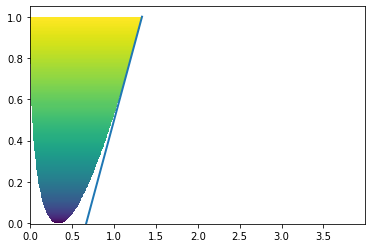

In [10]:
import numpy as np
from matplotlib import pyplot as plt


def g(a, b):
    Neg = (4*b - (b + 1 - 3*a )**2.0 )**(1/2)
    return np.maximum( abs((b + 1 - 3*a)*1j  - Neg)/2, abs((b + 1 - 3*a)*1j + Neg)/2)


delta = 0.005
a, b = np.arange(0, 4, delta), np.arange(0, 1, delta)
A, B = np.meshgrid(a, b)
Z2 = g(A, B)

plt.pcolor(A, B, Z2, shading='auto')
plt.plot( [2/3,4/3], [0, 1],  lw=2)
plt.show()


<ipython-input-11-22175b76bf97>:6: RuntimeWarning: invalid value encountered in sqrt
  Neg = (4*b - (b + 1 - 0.1 * a )**2.0 )**(1/2)


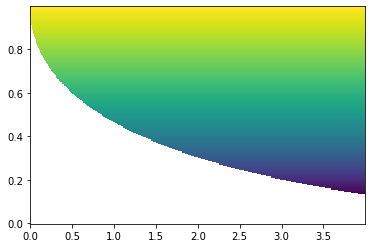

In [11]:
import numpy as np
from matplotlib import pyplot as plt


def g(a, b):
    Neg = (4*b - (b + 1 - 0.1 * a )**2.0 )**(1/2)
    return np.maximum( abs((b + 1 - 0.1 * a)*1j  - Neg)/2, abs((b + 1 - 0.1*a)*1j + Neg)/2)


delta = 0.005
a, b = np.arange(0, 4, delta), np.arange(-1, 1, delta)
A, B = np.meshgrid(a, b)
Z2 = g(A, B)

plt.pcolor(A, B, Z2, shading='auto')
#plt.plot( [2/3,4/3], [0, 1],  lw=2)
plt.show()


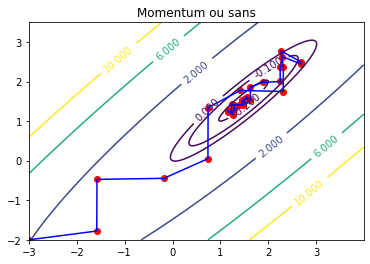

AVEC Inertie :  N =  1132 solution = 1.48. 1.52.


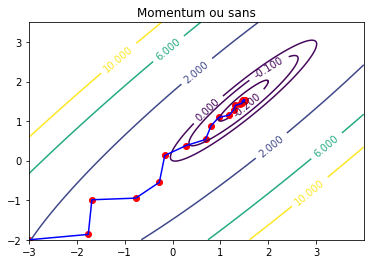

AVEC Inertie :  N =  1596 solution = 1.48. 1.52.


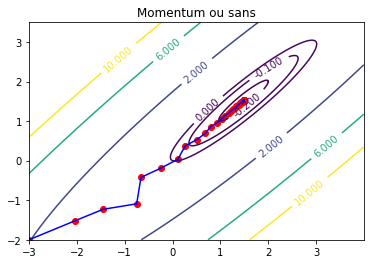

AVEC Inertie :  N =  2436 solution = 1.48. 1.52.


In [13]:
gradient_descent( alpha = 0.75, beta = 0.8) 
gradient_descent( alpha = 0.68, beta = 0.60)
gradient_descent( alpha = 0.75, beta = 0.47)


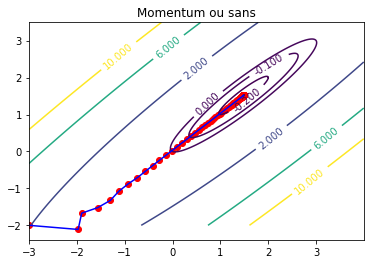

AVEC Inertie :  N =  219 solution = 1.48. 1.52.


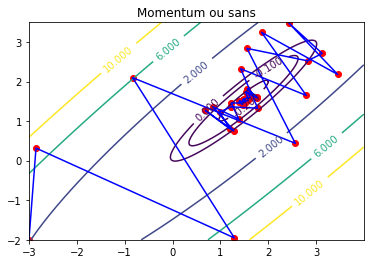

AVEC Inertie :  N =  10000 solution = 1.48. 1.52.


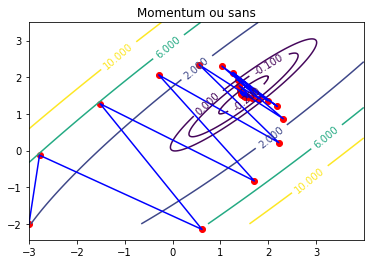

AVEC Inertie :  N =  119 solution = 1.48. 1.52.


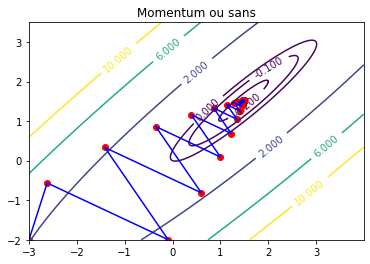

AVEC Inertie :  N =  10000 solution = 1.48. 1.52.


In [14]:
gradient_descent( alpha = 0.51, beta = 0.3)
gradient_descent( alpha = 1.15, beta = 0.8) 
gradient_descent( alpha = 1.048, beta = 0.6)
gradient_descent( alpha = 0.9534, beta = 0.4777)


### 2. Une fonction non convexe

In [4]:
def f2(x1, x2):
    return -0.8*np.exp( -2 *x1**2 - 5 *x2**2) - 0.2*np.exp(-.05*(x1+1)**2 - .09*(x2+2)**2)

delta = 0.005
x1, x2 = np.arange(-5, 3, delta), np.arange(-5,3, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

np.random.normal(0, 0.25)

# gradient of objective function
def gd2(x1, x2):
    return (3.2*x1*np.exp(-2*x1**2-5*x2**2) + .02*(x1+1)*np.exp(-.05*(x1+1)**2 - .09*(x2+2)**2),  
            8.0*x2*np.exp(-2*x1**2-5*x2**2) + .36*(x2+2)*np.exp(-.05*(x1+1)**2 - .09*(x2+2)**2))

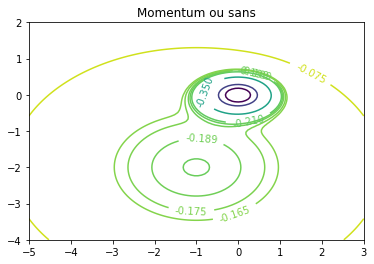

In [5]:
x1 = np.linspace(-5,3, 100)
x2 = np.linspace(-4,2, 100)
X1, X2 =np.meshgrid(x1,x2)
Z = f2(X1,X2)
Z.shape

#ax = plt.axes(projection = '3d')   # OOP
#ax.plot_surface(X,Y,Z, cmap = 'plasma')
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Z, [-0.8, -0.65, -0.35, -0.21, -0.199, -0.189, -0.175, -0.165,  -0.075, -0.02])
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Momentum ou sans')    
plt.show()

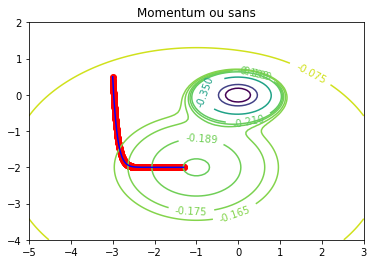

SANS Inertie :  N =  1000 solution = -1.31. -2.00.


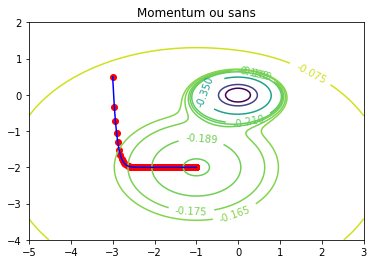

SANS Inertie :  N =  1000 solution = -1.00. -2.00.


In [6]:
tol = 1e-4
def gradient_descent(x10 = -3, x20 = 0.5, alpha = 0.3, beta = 0.2 ):
    x11, x22 = x10, x20
    set = [np.array([x11, x22])]
    dir1, dir2 = gd2(x11,x22)[0], gd2(x11,x22)[1]
    x11 -= alpha * dir1 
    x22 -= alpha * dir2  
    k = 1
    while (abs(x11) + abs(x22) > tol) and (k < 1e+3):       
        dir1, dir2 = beta* dir1 + gd2(x11,x22)[0], beta* dir2 + gd2(x11,x22)[1]
        x11 -= alpha * dir1 
        x22 -= alpha * dir2 
        set.append(np.array([x11, x22]))
        k += 1
        
    fig, ax = plt.subplots()
    CS = ax.contour(X1, X2, Z, [-0.8, -0.65, -0.35, -0.21, -0.199, -0.189, -0.175, -0.165,  -0.075, -0.02])
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title('Momentum ou sans')    
        
    x1s, x2s = np.array(set)[:, 0], np.array(set)[:, 1]
    plt.scatter(x1s, x2s,  color="red")
    plt.plot(x1s,x2s, color="blue")
    plt.show()
    if beta == 0:
        print("SANS Inertie :  N = ", k, "solution = %4.2f."% x11, "%4.2f." % x22  )
    else:
        print("AVEC Inertie :  N = ", k, "solution = %4.2f."% x11, "%4.2f." % x22)
        

gradient_descent( alpha = 0.100, beta = 0)   # sans momentum
gradient_descent( alpha = 0.999, beta = 0)   # sans momentum


In [7]:
print((math.sqrt(0.97) +1)**2/3)
print((1 -math.sqrt(0.97) +1)**2)
print((math.sqrt(0.99) +1)**2/3)

1.3132571867864071
1.030456879281558
1.3266582914044132


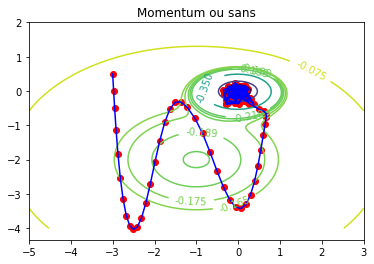

AVEC Inertie :  N =  1000 solution = -0.00. -0.16.


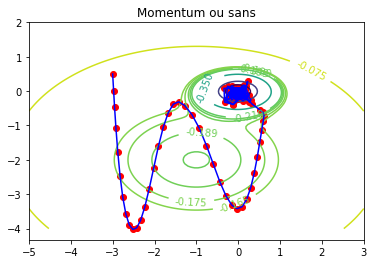

AVEC Inertie :  N =  1000 solution = -0.00. -0.13.


In [10]:
seed(2021)

gradient_descent( alpha = 0.405, beta = 0.97) 
gradient_descent( alpha = 0.393, beta = 0.97) 


- La descente de gradient sans inertie se déplace lentement, et il ne peut pas éviter les minima locaux ; 

- La descente de gradient avec inertie se déplace  plus rapidement, et il oscille dans et hors des minima locaux grâce à la quantité d'inertie accumulée au moment où elle atteint les minima locauxf. Malgré les demi-tours, il converge souvent assez rapidement.
 


### Quasi-hyperbolic Momentum  + ADAM 

- pour inclure l'algorithme de  Nesterov

Ma, Yarats (Facebook AI Research) dans "QUASI-HYPERBOLIC MOMENTUM AND ADAM FOR DEEP LEARNING" a proposé :

$$ 
QHM \ \ \boxed{
\begin{cases} 
D^{(k)} =  \beta D^{(k-1)} + (1 - \beta) \nabla F\Big(  X^{(k-1)}\Big) \\
\\
X^{(k)} =  X^{(k-1)} - \alpha \Big( \gamma D^{(k)} + (1-\gamma ) \nabla F\big(  X^{(k-1)}\big)\Big)   \\
\end{cases}}
$$

## III.  Adagrad : Adaptive subGradient


 $$
 \textrm{ L’hétérogénéité des pentes :  } \frac{\partial F}{\partial x_{i}}\big(x\big) < < \frac{\partial F}{\partial x_{j}}\big(x\big)
 $$
 
- un trop  grand pas entraîne la divergence en dicrection de $x_{j}$, 
- un trop petit pas fait difficilement progres en diect $x_{i}$.

Par conséquent, **on a besoin d'des pas (taux d'apprentissage) adaptatifs à chacune des directions.** ( Duchi et al 2011)


$$ 
Adagrad\ \ 
\boxed{
\begin{cases}
s_{k} = s_{k-1} +  \nabla F( X_{k-1}) \otimes \nabla F( X_{k-1})\\
\\
X_{k} =  X_{k-1} - \alpha \nabla F( X_{k-1})\oslash\sqrt{s_{k} + \epsilon} \\
\end{cases}}
$$

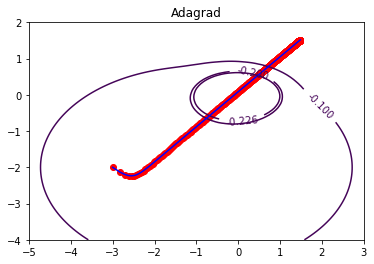

Adagrad :  N =  1697 solution = 1.48. 1.52.


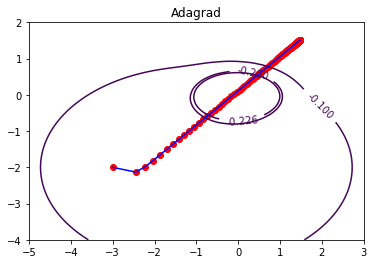

Adagrad :  N =  278 solution = 1.48. 1.52.


In [8]:
eps = 10**(-5)
tol = 1e-4
def Adagrad(x10 =-3, x20 =-2, alpha=0.3, n_iter = 30):
    x11, x22 = x10, x20
    set = [np.array([x11, x22])]
    s1, s2 = gd(x11,x22)[0]**2, gd(x11,x22)[1]**2
    k = 1
    while (abs(x11-c[0]) + abs(x22-c[1])) > tol and (k < 1e+4):
        
        s1, s2 = s1 + gd(x11,x22)[0]**2, s2 + gd(x11,x22)[1]**2
        x11 -= alpha * gd(x11,x22)[0]/math.sqrt(s1 + eps)           
        x22 -= alpha * gd(x11,x22)[1]/math.sqrt(s2 + eps) 
        set.append(np.array([x11, x22]))
        k += 1
        
    fig, ax = plt.subplots()
    CS = ax.contour(X1, X2, Z, [-0.2258, -0.2, -0.1, 0, 2, 6, 10])
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title('Adagrad')    
        
    x1s, x2s = np.array(set)[:, 0], np.array(set)[:, 1]
    plt.scatter(x1s, x2s,  color="red")
    plt.plot(x1s,x2s, color="blue")
    plt.show()
    print("Adagrad :  N = ", k, "solution = %4.2f."% x11, "%4.2f." % x22  )

Adagrad( alpha = 0.25)
Adagrad( alpha = 0.78)

## IV. RMSProp : Root Mean Squre Propagation

$$
RMSProp\ \ 
\boxed{
\begin{cases}
s_{k} = \beta s_{k-1} + (1-\beta) \nabla F( X_{k-1}) \otimes \nabla F( X_{k-1})\\
\\
X_{k} =  X_{k-1} - \alpha \nabla F( X_{k-1})\oslash\sqrt{s_{k} + \epsilon} \\
\end{cases}}
$$

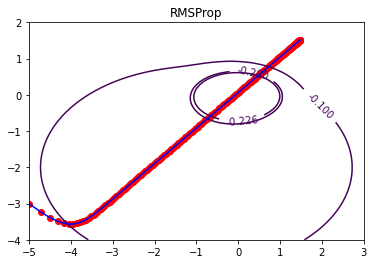

RMSprop :  N =  342 solution = 1.48. 1.52.


In [9]:
eps = 10**(-5)
tol = 1e-4
def RMSprop(x10 =-5, x20 =-3, alpha=0.3, beta = 0.5):

    x11, x22 = x10, x20
    set = [np.array([x11, x22])]
    s1, s2 = gd(x11,x22)[0]**2, gd(x11,x22)[1]**2
    k = 1 
    while (abs(x11-c[0]) + abs(x22-c[1])) > tol and (k < 1e+4):            
        s1, s2 = beta*s1 + (1-beta)*gd(x11,x22)[0]**2,  beta*s2 + (1-beta)*gd(x11,x22)[1]**2
        x11 -= alpha * gd(x11,x22)[0]/math.sqrt(s1+eps)           
        x22 -= alpha * gd(x11,x22)[1]/math.sqrt(s2+eps) 
        set.append(np.array([x11, x22]))
        k += 1
    fig, ax = plt.subplots()
    CS = ax.contour(X1, X2, Z, [-0.2258, -0.2, -0.1, 0, 2, 6, 10])
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title('RMSProp')    
        
    x1s, x2s = np.array(set)[:, 0], np.array(set)[:, 1]
    plt.scatter(x1s, x2s,  color="red")
    plt.plot(x1s,x2s, color="blue")
    plt.show()
    print("RMSprop :  N = ", k, "solution = %4.2f."% x11, "%4.2f." % x22  )

RMSprop( alpha = 0.288, beta = 0.99)


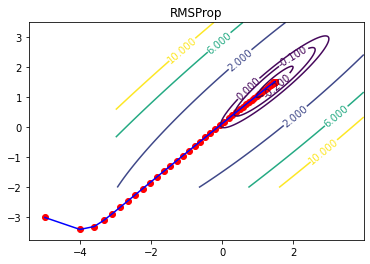

RMSprop :  N =  62 solution = 1.48. 1.52.


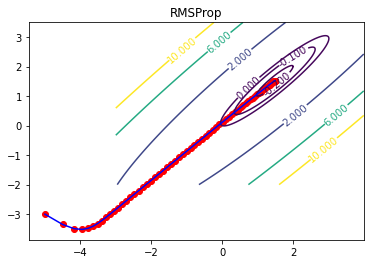

RMSprop :  N =  80 solution = 1.48. 1.52.


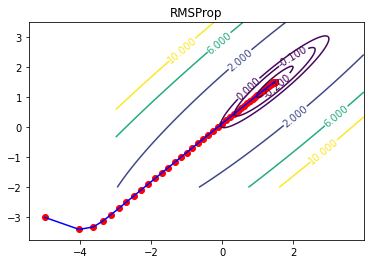

RMSprop :  N =  63 solution = 1.48. 1.52.


In [8]:
RMSprop( alpha = 0.99, beta = 0.96)
RMSprop( alpha = 0.50, beta = 0.95)
RMSprop( alpha = 0.97, beta = 0.96)


**Conclusion** : il nous faut d'inertie (momentum) et des paramètres adaptatifs, donc il nous faut  **ADAM** !

Références :
    
    - https://d2l.ai/chapter_optimization/momentum.html 
        
    - Jerry Ma, Denis Yarats (Facebook AI Research) QUASI-HYPERBOLIC MOMENTUM AND ADAM FOR DEEP LEARNING

   

## Merci !